<a href="https://colab.research.google.com/github/Nitesh-Kumar-074/NetwrokIntrusionDetectionSystem/blob/main/NIDS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/'

In [ ]:
import pickle

In [ ]:
# Train and Test data
x_train, y_train = pickle.load(open(file_path+'/final_train.pkl', 'rb'))
x_test, y_test = pickle.load(open(file_path+'/final_test.pkl', 'rb'))

# Dictionaries
saved_dict = pickle.load(open(file_path+'/saved_dict.pkl', 'rb'))
mode_dict = pickle.load(open(file_path+'/mode_dict.pkl', 'rb'))

# Standard scaler
scaler = pickle.load(open(file_path+'/scaler.pkl', 'rb'))

In [ ]:
x_train.shape , y_train.shape, x_test.shape, y_test.shape

((1778032, 50), (1778032,), (762015, 50), (762015,))

In [ ]:
x_test.shape

(762015, 50)

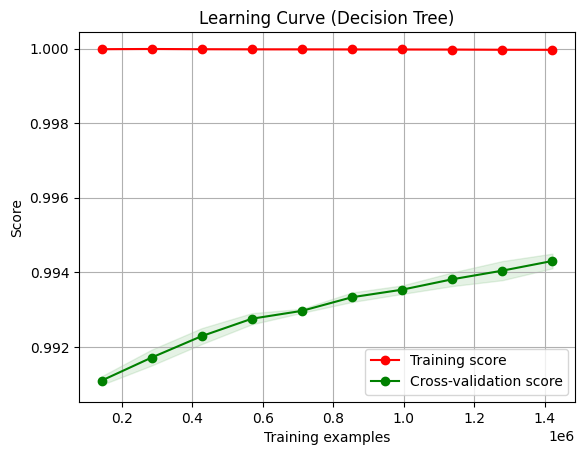

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve


# Initialize the Decision Tree model
model = DecisionTreeClassifier()

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model,
    x_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    n_jobs=-1
)

# Calculate the mean and standard deviation for training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for test scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.figure()
plt.title("Learning Curve (Decision Tree)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the mean and std deviation for training scores
plt.plot(train_sizes, train_scores_mean, 'o-', color='red', label='Training score')
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color='red')

# Plot the mean and std deviation for cross-validation scores
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1, color='green')

plt.legend(loc='best')
plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix

In [ ]:
logistic_regression_model = LogisticRegression(max_iter=5000)  # Increase max_iter if convergence issues occur
logistic_regression_model.fit(x_train, y_train)

# Save the logistic_regression_model using pickle
with open(file_path + '/logistic_regression_model.pkl', 'wb') as logistic_regression_model_file:
    pickle.dump(logistic_regression_model, logistic_regression_model_file)

# Make predictions
y_pred = logistic_regression_model.predict(x_test)

# Evaluate the logistic_regression_model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')

# Optional: Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7673720333589233
F1 Score: 0.26352131752349456
Precision: 0.21935109039223688
Confusion Matrix:
[[553035 112867]
 [ 64399  31714]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)  # You can adjust parameters as needed
decision_tree_model.fit(x_train, y_train)

# Save the decision_tree_model using pickle
with open(file_path + '/decision_tree_decision_tree_model.pkl', 'wb') as decision_tree_model_file:
    pickle.dump(decision_tree_model, decision_tree_model_file)

# Make predictions
y_pred = decision_tree_model.predict(x_test)

# Evaluate the decision_tree_model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')

# Optional: Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9906012348838278
F1 Score: 0.9631644996708361
Precision: 0.9523591574365077
Confusion Matrix:
[[661218   4684]
 [  2478  93635]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust parameters as needed
random_forest_model.fit(x_train, y_train)

# Save the random_forest_model using pickle
with open(file_path + '/random_forest_model.pkl', 'wb') as random_forest_model_file:
    pickle.dump(random_forest_model, random_forest_model_file)

# Make predictions
y_pred = random_forest_model.predict(x_test)

# Evaluate the random_forest_model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')

# Optional: Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9901235539982809
F1 Score: 0.9622147024269748
Precision: 0.9297627710668025
Confusion Matrix:
[[658663   7239]
 [   287  95826]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import recall_score

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)  # You can choose other kernels like 'rbf', 'poly', etc.
svm_model.fit(x_train, y_train)

# Save the svm_model using pickle
with open(file_path + '/svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)

# Make predictions
y_pred = svm_model.predict(x_test)

# Evaluate the svm_model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print("Recall:", recall)

# Optional: Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

NameError: name 'accuracy_score' is not defined

In [ ]:
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model to the training data
knn_model.fit(x_train, y_train)

# Save the knn_model using pickle
with open(file_path + '/knn_model.pkl', 'wb') as model_file:
    pickle.dump(knn_model, model_file)

# Make predictions
y_pred = knn_model.predict(x_test)

# Evaluate the knn_model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Optional: Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9885054756139972
F1 Score: 0.9885417621904079
Precision: 0.9885932093563531
Recall: 0.9885054756139972
Confusion Matrix:
[[660807   5095]
 [  3664  92449]]


Accuracy: 0.9906012348838278
F1 Score: 0.9631644996708361
Precision: 0.9523591574365077
Confusion Matrix:
[[661218   4684]
 [  2478  93635]]


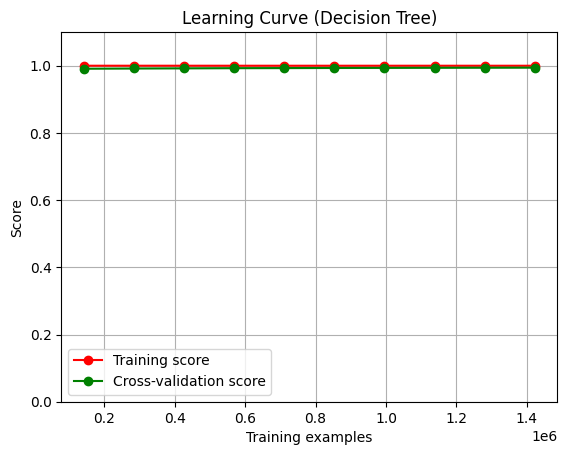

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
import pickle

# Assuming x_train, y_train, x_test, y_test are already defined

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model
decision_tree_model.fit(x_train, y_train)

# Save the model using pickle
# file_path = 'your_file_path_here'  # Replace with your actual file path
with open(file_path + '/decision_tree_model.pkl', 'wb') as decision_tree_model_file:
    pickle.dump(decision_tree_model, decision_tree_model_file)

# Make predictions
y_pred = decision_tree_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')

# Optional: Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Implementing the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    decision_tree_model, x_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 different training sizes
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # You can change this to 'f1' or 'precision' if needed
    n_jobs=-1  # Use all available cores
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.figure()
plt.title("Learning Curve (Decision Tree)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid()

# Plot the training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Plot the test scores
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    random_forest_model, x_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 different training sizes
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # You can change this to 'f1', 'precision', etc.
    n_jobs=-1  # Use all available cores
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid()

# Plot the training scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="r")

# Plot the test scores
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1, color="g")

plt.legend(loc="best")
plt.show()

KeyboardInterrupt: 